In [1]:
import os
from typing import Any

from agent_framework import ChatMessage, ConcurrentBuilder,WorkflowViz
from agent_framework.openai import OpenAIChatClient

In [2]:
chat_client = OpenAIChatClient(base_url=os.environ.get("GITHUB_ENDPOINT"), api_key=os.environ.get("GITHUB_TOKEN"), ai_model_id="gpt-4o" )

In [3]:
ResearcherAgentName = "Researcher-Agent"
ResearcherAgentInstructions = "You are my travel researcher, working with me to analyze the destination, list relevant attractions, and make detailed plans for each attraction."

In [4]:
PlanAgentName = "Plan-Agent"
PlanAgentInstructions = "You are my travel planner, working with me to create a detailed travel plan based on the researcher's findings."

In [5]:
research_agent   = chat_client.create_agent(
        instructions=(
           ResearcherAgentInstructions
        ),
        name=ResearcherAgentName,
    )

plan_agent = chat_client.create_agent(
        instructions=(
            PlanAgentInstructions
        ),
        name=PlanAgentName,
    )

In [6]:
workflow = ConcurrentBuilder().participants([research_agent, plan_agent]).build()

In [7]:
print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  dispatcher["dispatcher (Start)"];
  Researcher_Agent["Researcher-Agent"];
  Plan_Agent["Plan-Agent"];
  aggregator["aggregator"];
  fan_in__aggregator__69d73de8((fan-in))
  Plan_Agent --> fan_in__aggregator__69d73de8;
  Researcher_Agent --> fan_in__aggregator__69d73de8;
  fan_in__aggregator__69d73de8 --> aggregator;
  dispatcher --> Researcher_Agent;
  dispatcher --> Plan_Agent;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "dispatcher" [fillcolor=lightgreen, label="dispatcher\n(Start)"];
  "Researcher-Agent" [label="Researcher-Agent"];
  "Plan-Agent" [label="Plan-Agent"];
  "aggregator" [label="aggregator"];

  "fan_in::aggregator::69d73de8" [shape=ellipse, fillcolor=lightgoldenrod, label="fan-in"];
  "Plan-Agent" -> "fan_in::aggregator::69d73de8";
  "Researcher-Agent" -> "fan_in::aggregator::69d73de8";
  "fan_in::aggre

Attempting to display SVG file at: C:\Users\kinfeylo\AppData\Local\Temp\tmp1t175rhn.svg


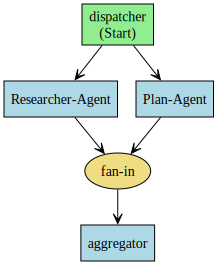

In [8]:
from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")

In [9]:
events = await workflow.run("Plan a trip to Seattle in December")
outputs = events.get_outputs()

In [10]:
if outputs:
        print("===== Final Aggregated Conversation (messages) =====")
        for output in outputs:
            messages: list[ChatMessage] | Any = output
            for i, msg in enumerate(messages, start=1):
                name = msg.author_name if msg.author_name else "user"
                print(f"{'-' * 60}\n\n{i:02d} [{name}]:\n{msg.text}")

===== Final Aggregated Conversation (messages) =====
------------------------------------------------------------

01 [user]:
Plan a trip to Seattle in December
------------------------------------------------------------

02 [Researcher-Agent]:
Seattle in December is a magical city, bustling with a holiday spirit enhanced by twinkling lights, festive displays, and a touch of rainy charm. The Emerald City offers a perfect mix of indoor and outdoor attractions, cozy cafes, and vibrant holiday events. Below is your detailed plan for a trip to Seattle in December, including key attractions and activities tailored to the season.

---

### **Overview of the Trip:**
- **Destination**: Seattle, Washington
- **Length of Stay**: 3–5 days (adjustable based on your preferences)
- **Focus**: Iconic landmarks, holiday activities, cozy indoor spots, and nature.

---

### **Key Considerations:**
- **Weather**: Expect temperatures ranging from 35°F to 45°F (2°C to 7°C). Rain is common in December, so 